<a href="https://colab.research.google.com/github/xbarto0c/MPC-MLF/blob/main/Kopie_se%C5%A1itu_MPA_MLF_SVM_2students_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [1]:

import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
import numpy as np
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:]) # where the features are stored
print(iris.target[0:5]) # where the classes are stored
print(iris.target[:]);


#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data[iris.target!=2,0:2]
y=iris.target[iris.target!=2]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # 80 % data in the training set, 20 % in the test set
print(X_train.shape)
print(X_test.shape)
print(X.shape);

(80, 2)
(20, 2)
(100, 2)


Use a Support Vector Machine for classification:


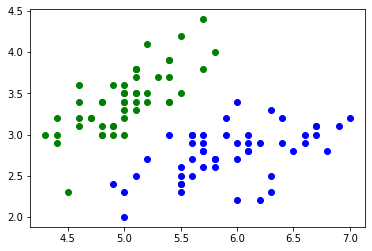

1.0


In [3]:
plt.figure(1);

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='green');
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue');
plt.draw()
plt.pause(0.001)


# plt.scatter(X[y == 2, 0], X[y == 2, 1], color='cyan');

from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear', decision_function_shape='ovr') # support vector classifier, kernel -> fce na oddělení tříd, parametr c -> pro nerozdělitelné třídy, kompenzace
# ovr -> one versus rest
SVMmodel.fit(X_train,y_train) # fit data on the train data
SVMmodel.get_params()
print(SVMmodel.score(X_test,y_test)) # test it on testing data

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



Plot scatterplots of targets 0 and 1 and check the separability of the classes:

In [4]:
import matplotlib.pyplot as plt 


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

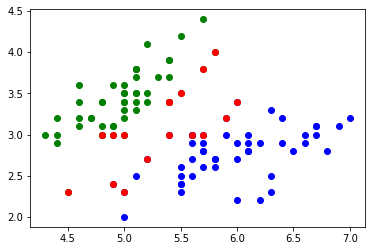

In [5]:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here
plt.figure(2);
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='green'); # plot the support vectors
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue');
plt.scatter(supvectors[:,0],supvectors[:,1], color='red');
plt.draw()
plt.pause(0.001)

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[ 2.22074045 -2.22152761]]


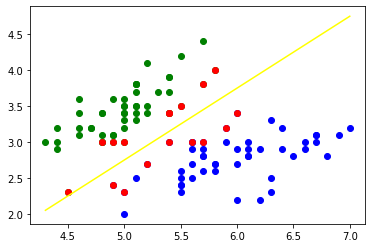

In [6]:
#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W);

x_line_data = np.linspace(min(X[:,0]), max(X[:,0]), 10);
y_line_data = -W[:,0]/W[:,1]*x_line_data-b/W[:,1]; # vyjádřeno z W.X+B=0, x0 a x1 jsou proměnné
plt.figure(3);
plt.plot(x_line_data,y_line_data, color = 'yellow');
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'green'); # plot the support vectors
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue');
plt.scatter(supvectors[:,0],supvectors[:,1], color='red');
plt.draw()
plt.pause(0.001)

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

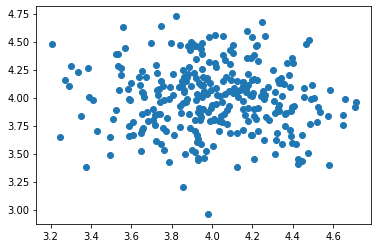

In [7]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

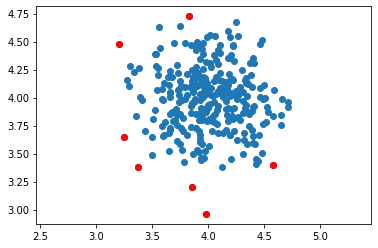

In [8]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

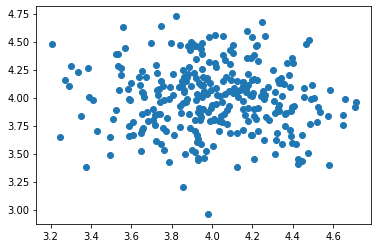

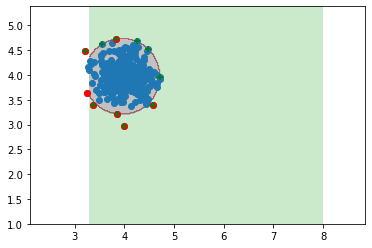

In [9]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.draw()
plt.pause(0.001)


SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03) # one class classifier defining the borders, round base function kernel


clf = SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]
supvectors=SVMmodelOne.support_vectors_;

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                         np.arange(x2_min, x2_max, 0.02))
Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.figure(4);

plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='Accent')

plt.scatter(x[:,0], x[:,1])

plt.scatter(values[:,0], values[:,1], color='red')
plt.scatter(supvectors[:,0],supvectors[:,1], color='green', marker = '+');
plt.axis('equal');
plt.draw(); # continues the program execution whilst keeping this figure open
plt.pause(0.001);

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


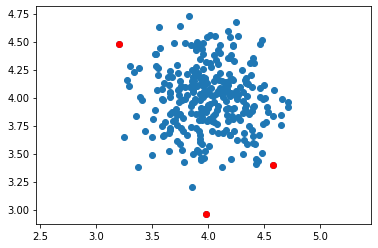

In [10]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()